<a href="https://colab.research.google.com/github/Ru1chi/NLP/blob/main/nlp_sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:

import os

In [ ]:
!pwd

/content


In [ ]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:

!kaggle competitions download -c sentiment-analysis-on-movie-reviews


  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 133MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname='data/train.tsv.zip'
test_fname='data/test.tsv.zip'
sub_fname='data/sampleSubmission.csv'

In [ ]:
import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_fname,sep='\t')

In [ ]:
raw_df


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
raw_df.Phrase.sample(10).values#there are phrase for reviews not swntences

array(['Love Call to Jeanette MacDonald', 'own actions and revelations',
       'Robert Altman , Spike Lee ,',
       'A stylish but steady , and ultimately very satisfying , piece of character-driven storytelling',
       'badly', 'Universal Studios and its ancillary products',
       'cellophane-pop remake', 'Reaches', 'other foul substances',
       'there are moments of jaw-droppingly odd behavior'], dtype=object)

In [ ]:
test_df=pd.read_csv(test_fname,sep='\t')

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
sub_df=pd.read_csv(sub_fname)

In [ ]:
sub_df#sentiments goes form 0-4 0 is negative and 2 is neutral and 4 is positive

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [ ]:
raw_df.shape

(156060, 4)

<Axes: xlabel='Sentiment'>

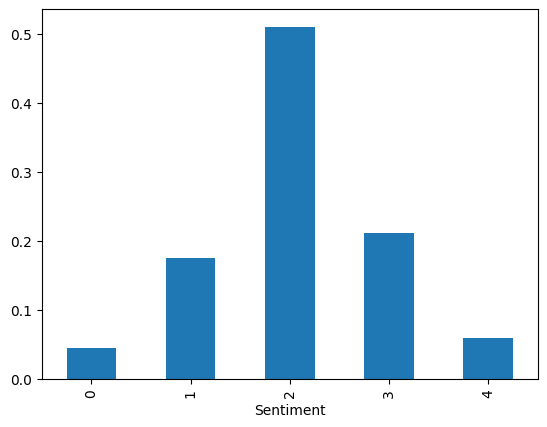

In [ ]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer=SnowballStemmer(language='english')

In [ ]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha() if token.isdigit]#isalpha removes punctuatiom marks

In [ ]:
tokenize("is this  (the ) reality os is the : fantasy of 32?#")

['is', 'this', 'the', 'realiti', 'os', 'is', 'the', 'fantasi', 'of']

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')#from the stop_words we need to remove negative words as we are doing sentiment analysis

In [ ]:

",".join(stop_words[:115])


"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some"

In [ ]:
selected_stopwords=stop_words[:115]

In [ ]:
vectorizer=TfidfVectorizer(tokenizer=tokenize,
                           stop_words=selected_stopwords,
                           ngram_range=(1,2),
                           max_features=2000)

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7b2087a9d630>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
inputs=vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_df['Phrase'] = test_df['Phrase'].fillna('')  # Replace NaN with empty strings

test_inputs=vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
train_size=110_000

In [ ]:
train_inputs=inputs[:train_size]
train_targets=raw_df.Sentiment[:train_size]

In [ ]:
#so we need x_train y_train as
train_inputs.shape,train_targets.shape


((110000, 2000), (110000,))

In [62]:
val_inputs=inputs[train_size:]
val_targets=raw_df.Sentiment[train_size:]

In [63]:
#so we need x_test and y_test as
val_inputs.shape,val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
train_pred=model.predict(train_inputs)

In [56]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [57]:
train_pred#the train_target and train_pred are not even close

array([3, 2, 2, ..., 0, 0, 2])

In [58]:
from sklearn.metrics  import accuracy_score

In [59]:
accuracy_score(train_targets,train_pred)

0.6381818181818182

In [64]:
val_pred=model.predict(val_inputs)

In [65]:
accuracy_score(val_targets,val_pred)

0.5795049934867564

### Study Predictions on Sample Inputs

In [67]:
small_df=raw_df.sample(20)

In [68]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
28495,28496,1318,Michael J. Wilson,2
9162,9163,382,'s neither,2
80710,80711,4157,"to bring together Kevin Pollak , former wrestl...",2
124579,124580,6694,So verbally flatfooted and so emotionally pred...,1
40726,40727,1952,did n't convince me that Calvin Jr. 's Barbers...,1
55785,55786,2789,illustrates the picture 's moral schizophrenia,1
134016,134017,7232,to be decipherable,2
84713,84714,4382,Hollywood star,2
95017,95018,4956,"redeem their mentally `` superior '' friends ,...",2
77239,77240,3973,gives you,2


In [69]:
small_inputs=vectorizer.transform(small_df.Phrase)

In [70]:
small_inputs.shape

(20, 2000)

In [71]:
small_pred=model.predict(small_inputs)

In [72]:
small_pred

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [73]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [74]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181513 stored elements in Compressed Sparse Row format>

In [75]:
test_pred=model.predict(test_inputs)

In [76]:
test_pred

array([3, 3, 2, ..., 2, 2, 1])

In [77]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [78]:
sub_df.Sentiment= test_pred

In [79]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [80]:
sub_df.to_csv("submission.csv",index=None)

In [81]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3
